In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings("ignore")

## **1. Data Importing and Cleaning**

In [17]:
df = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")
df.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [18]:
df.shape

(338199, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [20]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [24]:
df.shape

(338171, 9)

## **2. Exploratory Data Analysis (EDA)**

In [25]:
df.describe() 

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [26]:
df.describe(include='object') 

,name,orbiting_body
count,338171,338171
unique,33511,1
top,277810 (2006 FV35),Earth
freq,211,338171


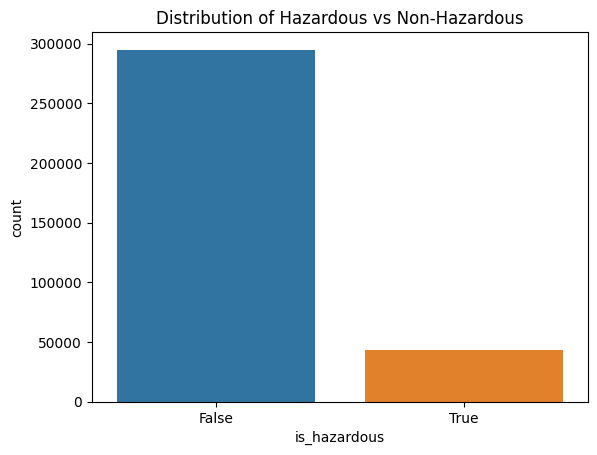

In [27]:
# Visualizing distribution of 'is_hazardous' column
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous vs Non-Hazardous')
plt.show()

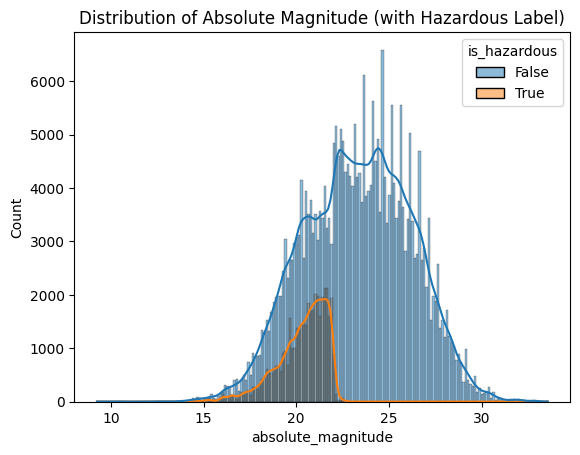

In [28]:
sns.histplot(data=df, x='absolute_magnitude', hue='is_hazardous', kde=True)
plt.title('Distribution of Absolute Magnitude (with Hazardous Label)')
plt.show()

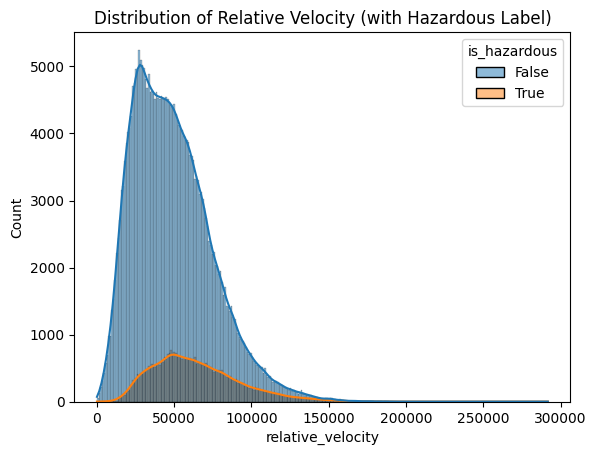

In [29]:
sns.histplot(data=df, x='relative_velocity', hue='is_hazardous', kde=True)
plt.title('Distribution of Relative Velocity (with Hazardous Label)')
plt.show()

## **3. Data Preprocessing**

In [30]:
# Feature Selection: Dropping irrelevant or redundant columns
df = df.drop(columns=['name', 'orbiting_body'])

# Encoding categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [31]:
# Separate features and target variable
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']

In [32]:
# Normalizing/Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Handling Imbalanced Classes
# Using SMOTE for oversampling
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [34]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **4. Model Training and Evaluation**

In [35]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     59040
        True       0.98      0.99      0.99     58964

    accuracy                           0.99    118004
   macro avg       0.99      0.99      0.99    118004
weighted avg       0.99      0.99      0.99    118004



In [44]:
# Balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc}")

Balanced Accuracy Score: 0.9860366036352345


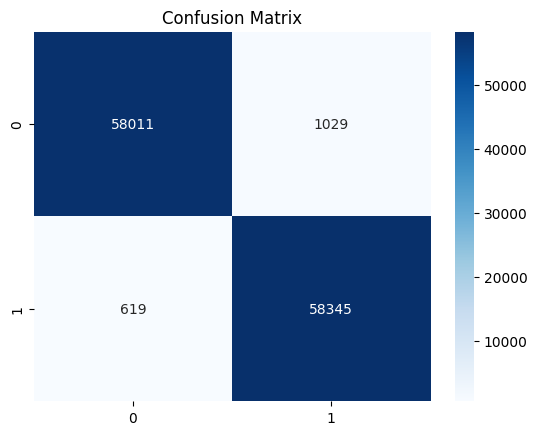

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [41]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [42]:
roc_auc  = roc_auc_score(y_test, y_pred_prob)
print('AUC-ROC:', roc_auc)

AUC-ROC: 0.9988725963642049


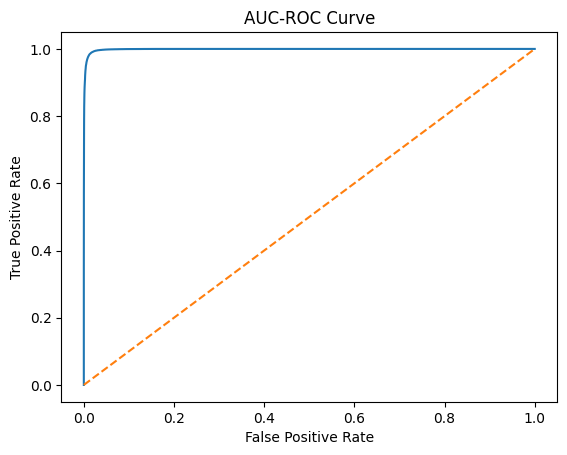

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()